In [280]:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# fix random seed for reproducibility
np.random.seed(42)

In [281]:
print(tf.__version__)
print(keras.__version__)

2.2.0
2.4.3


In [282]:
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

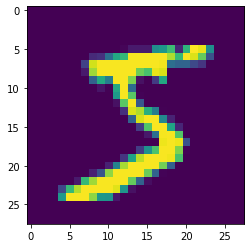

In [283]:
plt.imshow(x_train[0])

In [284]:
x_train.shape

(60000, 28, 28)

In [285]:
x_train.min(), x_train.max()

(0, 255)

In [286]:
# normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [287]:
# reshape images to 1D so we can just work with dense layers
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [288]:
num_classes = 10

# One hot encoding for categorical labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [289]:
#Take a subset of train for grid search. Let us take 10% for now
from sklearn.model_selection import train_test_split
x_grid, x_not_use, y_grid, y_not_use = train_test_split(x_train, y_train, test_size=0.9, random_state=42)

# build the model
input_dim = x_grid.shape[1]

In [290]:
def define_model(activation='relu', init_weights='uniform', optimizer='Adam'):   
    model = Sequential()
    model.add(Dense(64, activation=activation, kernel_initializer=init_weights, 
                    input_dim = input_dim)) 
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_weights, activation=activation))
    model.add(Dense(num_classes, kernel_initializer=init_weights, activation='softmax'))
    
    # compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,      
                  metrics=['acc'])
    return model

In [291]:
from keras.wrappers.scikit_learn import KerasClassifier
batch_size = 100
epochs = 10

In [292]:
model = KerasClassifier(build_fn=define_model, 
                        epochs=epochs, 
                        batch_size = batch_size, 
                        verbose=1)

In [293]:
activation = ['softmax', 'relu', 'sigmoid','softplus','tanh']

init_weights = ['uniform', 'normal', 'he_uniform', 'he_normal']
 
optimizer = ['SGD', 'RMSprop', 'Adam']

In [294]:
param_grid = dict(activation=activation, init_weights=init_weights, optimizer=optimizer)

In [295]:
#Cross validation, cv=3
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [296]:
grid_result = grid.fit(x_grid, y_grid)

Epoch 1/10
60/60 [==============================] - 0s 3ms/step - loss: 1.1888 - acc: 0.6570
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.4481 - acc: 0.8657
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3340 - acc: 0.9010
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2711 - acc: 0.9223
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2338 - acc: 0.9310
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2058 - acc: 0.9378
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1751 - acc: 0.9478
Epoch 8/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1594 - acc: 0.9540
Epoch 9/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1387 - acc: 0.9612
Epoch 10/10
60/60 [==============================] - 0s 3ms/step - loss: 0.1271 - acc: 0.9602


In [297]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

Best: 0.931333 using {'activation': 'relu', 'init_weights': 'he_uniform', 'optimizer': 'Adam'}
Mean = 0.112333 (std=0.007487) with: {'activation': 'softmax', 'init_weights': 'uniform', 'optimizer': 'SGD'}
Mean = 0.263667 (std=0.119466) with: {'activation': 'softmax', 'init_weights': 'uniform', 'optimizer': 'RMSprop'}
Mean = 0.481000 (std=0.070885) with: {'activation': 'softmax', 'init_weights': 'uniform', 'optimizer': 'Adam'}
Mean = 0.112333 (std=0.007487) with: {'activation': 'softmax', 'init_weights': 'normal', 'optimizer': 'SGD'}
Mean = 0.363833 (std=0.142732) with: {'activation': 'softmax', 'init_weights': 'normal', 'optimizer': 'RMSprop'}
Mean = 0.609167 (std=0.115266) with: {'activation': 'softmax', 'init_weights': 'normal', 'optimizer': 'Adam'}
Mean = 0.106333 (std=0.006485) with: {'activation': 'softmax', 'init_weights': 'he_uniform', 'optimizer': 'SGD'}
Mean = 0.604167 (std=0.127933) with: {'activation': 'softmax', 'init_weights': 'he_uniform', 'optimizer': 'RMSprop'}
Mean = 0

### From the above result, it can be seen that the best parameters for the given data are 'activation': 'relu',  'optimizer': 'Adam'

In [298]:
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [299]:
# normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [300]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [301]:
input_shape = x_train[0].shape

In [302]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=input_shape))
model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [303]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [304]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [305]:
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 75s 161ms/step - loss: 0.2361 - accuracy: 0.9283 - val_loss: 0.0515 - val_accuracy: 0.9840
Epoch 2/10
469/469 [==============================] - 65s 138ms/step - loss: 0.0828 - accuracy: 0.9754 - val_loss: 0.0389 - val_accuracy: 0.9877
Epoch 3/10
469/469 [==============================] - 67s 142ms/step - loss: 0.0623 - accuracy: 0.9812 - val_loss: 0.0323 - val_accuracy: 0.9896
Epoch 4/10
469/469 [==============================] - 65s 139ms/step - loss: 0.0503 - accuracy: 0.9850 - val_loss: 0.0316 - val_accuracy: 0.9895
Epoch 5/10
469/469 [==============================] - 65s 138ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0334 - val_accuracy: 0.9895
Epoch 6/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0390 - accuracy: 0.9875 - val_loss: 0.0277 - val_accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.0296 - val_ac

In [306]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0264 - accuracy: 0.9921


[0.02640431746840477, 0.9921000003814697]

In [307]:
history.history

{'loss': [0.23610132932662964,
  0.08277978003025055,
  0.06233224272727966,
  0.05026600882411003,
  0.04388465732336044,
  0.0389559380710125,
  0.03463516756892204,
  0.028931692242622375,
  0.02985280007123947,
  0.02689930610358715],
 'accuracy': [0.9282500147819519,
  0.9753833413124084,
  0.981249988079071,
  0.9850000143051147,
  0.986050009727478,
  0.9874833226203918,
  0.9887333512306213,
  0.9909666776657104,
  0.9899500012397766,
  0.9910500049591064],
 'val_loss': [0.05149037018418312,
  0.038918476551771164,
  0.032296568155288696,
  0.03157179430127144,
  0.033428166061639786,
  0.027691854164004326,
  0.02956276573240757,
  0.032713908702135086,
  0.030827563256025314,
  0.02640431746840477],
 'val_accuracy': [0.984000027179718,
  0.9876999855041504,
  0.9896000027656555,
  0.9894999861717224,
  0.9894999861717224,
  0.991599977016449,
  0.9916999936103821,
  0.9909999966621399,
  0.9907000064849854,
  0.9921000003814697]}

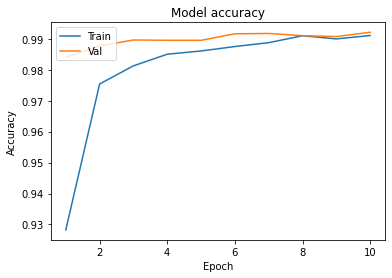

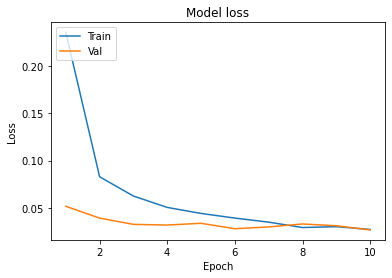

In [308]:
# Plot training & validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### From above graph is seen that our model is perfect not overfit or underfit